In [44]:
import pandas as pd
from pathlib import Path
import pickle as pkl
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format

In [45]:
def custom_plots(ax=None):
    if ax is None:
        ax = plt.gca()
    #ax.grid(False)
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    #size of labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # size of axes
    plt.xlabel(ax.get_xlabel(), fontsize=14)
    plt.ylabel(ax.get_ylabel(), fontsize=14)
    #size of title
    plt.title(ax.get_title(), fontsize=18)

In [46]:
DIR = "/raid5pool/tank/luehring/german_newsguard_tweets/"
DATA_DIR = join(DIR, "discussions/")
OUPUT_DIR = "../matching/"
FIGURES = "/home/luehring/emomis-discussions/emomis-discussion-paper/figures/"

with open(join(DIR, "dtypes_config.pickle"), "rb") as file:
    DTYPES = pkl.load(file)

In [47]:
def process_log_natural(filepath, emotions):
    df = pd.read_csv(filepath, index_col=0)
    
    #rename index 
    df.index.name = "Variable"

    #rename emotion columns
    for emotion in emotions:
        df.index = df.index.str.replace(emotion, emotion[:-4])

    df.index = df.index.str.replace("author.", "")
    df.index = df.index.str.replace("_", " ")
    df.index = df.index.str.replace("log", "(log)")
    df.index = df.index.str.capitalize()
    df.index = df.index.str.replace("Orientation", "Bias")

    return df

In [48]:
emotions_log = ["anger_log", "disgust_log", "fear_log", "sadness_log", 
                "joy_log", "pride_log", "hope_log"]
wd_log = process_log_natural("./replies/all_replies/bias_log/summary_nearest_mahalanobis_all.csv", emotions_log)
wd_not_log = process_log_natural("./replies/all_replies/bias_natural/summary_nearest_mahalanobis_all.csv", emotions_log)
fr_log = process_log_natural("./replies/first_replies/bias_log/summary_nearest_mahalanobis_first.csv", emotions_log)
fr_not_log = process_log_natural("./replies/first_replies/bias_natural/summary_nearest_mahalanobis_first.csv", emotions_log)
starters_log = process_log_natural("./starters/bias_log/summary_starters_nearest_mahalanobis.csv", emotions_log)

/tmp/ipykernel_3613115/1470845431.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace("author.", "")
/tmp/ipykernel_3613115/1470845431.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace("author.", "")
/tmp/ipykernel_3613115/1470845431.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace("author.", "")
/tmp/ipykernel_3613115/1470845431.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace("author.", "")
/tmp/ipykernel_3613115/1470845431.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace("author.", "")


In [49]:
fr_log.index

Index(['Bias', 'Anger', 'Fear', 'Disgust', 'Sadness', 'Joy', 'Pride', 'Hope',
       'Word count (log)', 'Followers count (log)', 'Following count (log)',
       'Tweet count (log)', 'Tweet count first (log)'],
      dtype='object', name='Variable')

In [50]:
# order starters 
starters_order = ["Anger", "Disgust", "Fear", "Sadness", 
         "Joy", "Pride", "Hope", 
         "Bias", 
         "Following count (log)", "Followers count (log)", 
         "Word count (log)",
         "Tweet count (log)", ]

wd_order = ["Anger", "Disgust", "Fear", "Sadness", 
            "Joy", "Pride", "Hope", 
            "Bias", 
            "Following count (log)", "Followers count (log)", 
            "Word count (log)",
            "Tweet count (log)", "Tweet count avg (log)",
            "Time diff (log)"]

fr_order = ["Anger", "Disgust", "Fear", "Sadness", 
            "Joy", "Pride", "Hope", 
            "Bias", 
            "Following count (log)", "Followers count (log)", 
            "Word count (log)",
            "Tweet count (log)", "Tweet count first (log)"]

starters_log = starters_log.loc[starters_order]
wd_log = wd_log.loc[wd_order]
wd_not_log = wd_not_log.loc[wd_order]
fr_log = fr_log.loc[fr_order]
fr_not_log = fr_not_log.loc[fr_order]

/tmp/ipykernel_3613115/1721631415.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


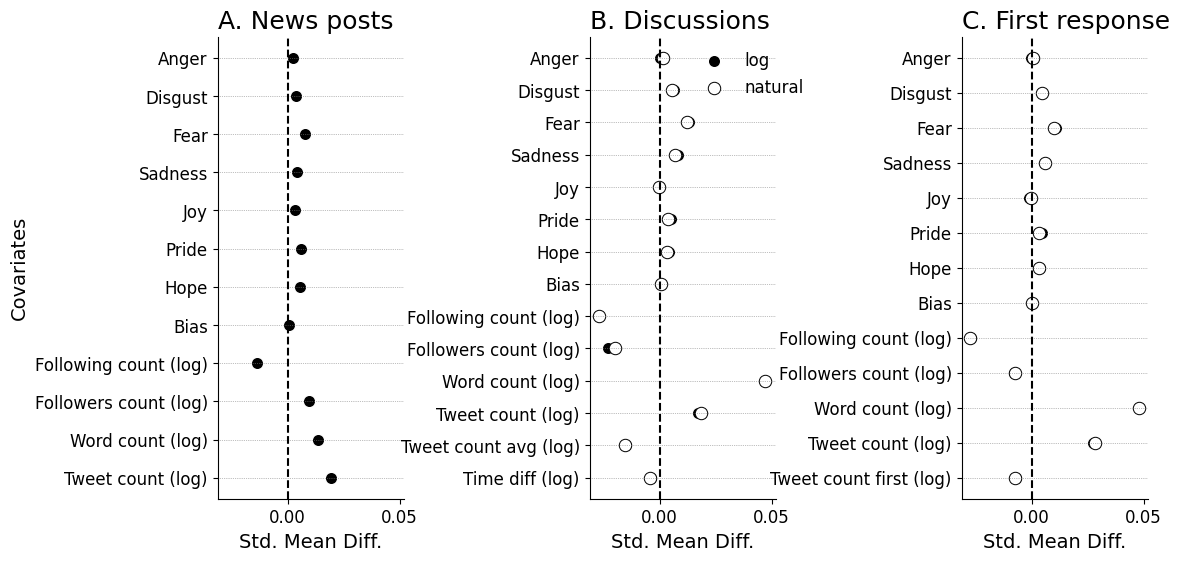

In [51]:
fig, axes = plt.subplots(1, 3, 
                         figsize=(12, 6),
                         gridspec_kw={"wspace": 1},
                         sharex=True, sharey=False)  
    
sns.scatterplot(data=starters_log, 
                y="Variable", 
                x="Std. Mean Diff.",
                color="black",
                s=80,
                linewidth=1,
                ax=axes[0])

# sns.scatterplot(data=wd_not_log, 
#                 y="Variable", 
#                 x="Std. Mean Diff.",
#                 s=80,
#                 color="white",
#                 edgecolor="black",
#                 ax=axes[1])  

# axes[1].legend(
#                labels=["log", "natural"],
#                loc="upper left", fontsize=12)

# legend.get_frame().set_edgecolor("black")
axes[0].set_title("A. News posts", fontsize=18, loc="left")

axes[0].grid(True, which='major', axis='y', color='gray', linestyle=':', linewidth=0.5) 
axes[0].axvline(0, color="black", linestyle="--")
custom_plots(axes[0])
axes[0].set_xlabel("Std. Mean Diff.", fontsize=14)
axes[0].set_ylabel("Covariates", fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=wd_log, 
                y="Variable", 
                x="Std. Mean Diff.",
                color="black",
                s=80,
                linewidth=1,
                ax=axes[1])

sns.scatterplot(data=wd_not_log, 
                y="Variable", 
                x="Std. Mean Diff.",
                s=80,
                color="white",
                edgecolor="black",
                ax=axes[1])  

axes[1].legend(
               labels=["log", "natural"],
               loc="upper left", fontsize=12,
               frameon=False,
               bbox_to_anchor=(0.5, 1))

# legend.get_frame().set_edgecolor("black")
axes[1].set_title("B. Discussions", fontsize=18, loc="left")

axes[1].set_ylabel("", fontsize=14)

axes[1].grid(True, which='major', axis='y', color='gray', linestyle=':', linewidth=0.5) 
axes[1].axvline(0, color="black", linestyle="--")
custom_plots(axes[1])
axes[1].set_xlabel("Std. Mean Diff.", fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=fr_log, 
                y="Variable", 
                x="Std. Mean Diff.",
                color="black",
                s=80,
                linewidth=1,
                ax=axes[2]) 

sns.scatterplot(data=fr_not_log, 
                y="Variable", 
                x="Std. Mean Diff.",
                s=80,
                color="white",
                edgecolor="black",
                ax=axes[2])  

axes[2].grid(True, 
             which='major', 
             axis='y',
             color='gray', 
             linestyle=':', 
             linewidth=0.5) 

# axes[2].legend(
#                labels=["log", "natural"],
#                loc="upper left", fontsize=12,
#                frameon=True)

# legend.get_frame().set_edgecolor("black")

axes[2].axvline(0, color="black", linestyle="--")
axes[2].set_title("C. First response", fontsize=18,
                  #left align
                    loc="left")
axes[2].set_ylabel("", fontsize=14)


custom_plots(axes[2])

plt.tight_layout()

# fig.savefig(join(OUPUT_DIR, "./replies/mahalanobis_log_comparison.pdf"), dpi=300)


plt.show()

In [52]:
print(starters_log["Std. Mean Diff."].mean())
print(wd_log["Std. Mean Diff."].mean())
print(fr_log["Std. Mean Diff."].mean())

0.005200000000000001
0.002392857142857143
0.004807692307692307


In [53]:
def process_both_methods(filepath):
    df = pd.read_csv(filepath, index_col=0)
    
    #rename index 
    df.index.name = "Variable"

    df.index = df.index.str.replace("author.", "", regex=True)
    df.index = df.index.str.replace("_", " ")
    df.index = df.index.str.replace("log", "(log)")
    df.index = df.index.str.capitalize()
    df.index = df.index.str.replace("Orientation", "Bias")
    if "Distance" in df.index:
        df = df.drop("Distance")

    return df

starters_mahalanobis = process_both_methods("./starters/bias_log/summary_starters_nearest_mahalanobis.csv")
starters_glm = process_both_methods("./starters/bias_log/summary_starters_nearest_glm.csv")
wd_mahalanobis = process_both_methods("./replies/all_replies/bias_log/summary_nearest_mahalanobis_all.csv")
fr_mahalanobis = process_both_methods("./replies/first_replies/bias_log/summary_nearest_mahalanobis_first.csv")
wd_glm = process_both_methods("./replies/all_replies/bias_log/summary_nearest_glm_all.csv")
fr_glm = process_both_methods("./replies/first_replies/bias_log/summary_nearest_glm_first.csv")

In [54]:
starters_order = [
         "Anger (log)", "Disgust (log)", "Fear (log)", "Sadness (log)",
         "Joy (log)", "Pride (log)", "Hope (log)",
         "Bias", 
         "Following count (log)", "Followers count (log)", 
         "Word count (log)",
         "Tweet count (log)", ]

wd_order = [
            "Anger (log)", "Disgust (log)", "Fear (log)", "Sadness (log)",
            "Joy (log)", "Pride (log)", "Hope (log)",
            "Bias", 
            "Following count (log)", "Followers count (log)", 
            "Word count (log)",
            "Tweet count (log)", "Tweet count avg (log)",
            "Time diff (log)"]

fr_order = [
            "Anger (log)", "Disgust (log)", "Fear (log)", "Sadness (log)",
            "Joy (log)", "Pride (log)", "Hope (log)",
            "Bias", 
            "Following count (log)", "Followers count (log)", 
            "Word count (log)",
            "Tweet count (log)", "Tweet count first (log)"]

starters_mahalanobis = starters_mahalanobis.loc[starters_order]
wd_mahalanobis = wd_mahalanobis.loc[wd_order]
fr_mahalanobis = fr_mahalanobis.loc[fr_order]
wd_glm = wd_glm.loc[wd_order]
fr_glm = fr_glm.loc[fr_order]

/tmp/ipykernel_3613115/2973042913.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


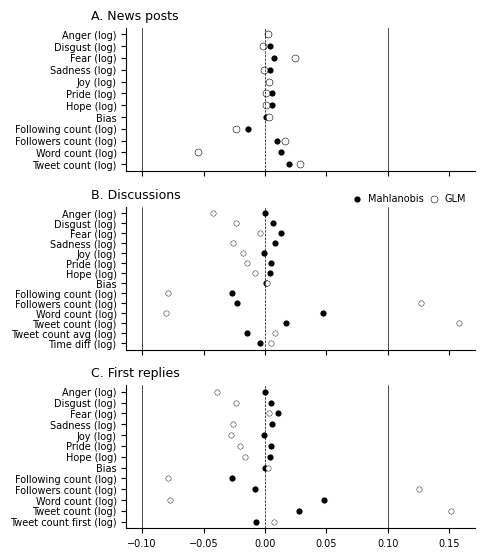

In [55]:
fig, axes = plt.subplots(3, 1, 
                         figsize=(4.5, 6.5),
                          gridspec_kw={"hspace": 0.25},
                         sharex=True, sharey=False)  

# # rename variables
# starters_mahalanobis.index = starters_mahalanobis.index.str.replace(" count", "")
# starters_glm.index = starters_glm.index.str.replace(" count", "")
# wd_mahalanobis.index = wd_mahalanobis.index.str.replace(" count", "")
# fr_mahalanobis.index = fr_mahalanobis.index.str.replace(" count", "")
# wd_glm.index = wd_glm.index.str.replace(" count", "")
# fr_glm.index = fr_glm.index.str.replace(" count", "")

sns.scatterplot(data=starters_mahalanobis, 
                y="Variable", 
                x="Std. Mean Diff.",
                color="black",
                s=30,
                linewidth=1,
                ax=axes[0])

sns.scatterplot(data=starters_glm, 
                y="Variable", 
                x="Std. Mean Diff.",
                s=25,
                color="white",
                edgecolor="black",
                ax=axes[0])  

axes[0].legend(frameon=False,
               labels=["Mahlanobis", "GLM"],
               ncol=2,
               handletextpad=0.1,
               columnspacing=0.1,
               loc="upper right", fontsize=7,
               bbox_to_anchor=(1, -0.1))

# legend.get_frame().set_edgecolor("black")
axes[0].set_title("A. News posts", fontsize=9, loc="left",
                  x=-0.1)

# axes[0].grid(True, which='major', axis='y', color='gray', linestyle=':', linewidth=0.5) 
axes[0].axvline(0, color="black", linestyle="--", linewidth=0.5)
#add solid line at 0.1
axes[0].axvline(0.1, color="black", linestyle="-", linewidth=0.5)
axes[0].axvline(-0.1, color="black", linestyle="-", linewidth=0.5)
custom_plots(axes[0])
axes[0].set_ylabel("", fontsize=8, labelpad=-4)
axes[0].tick_params(axis='both', which='major', labelsize=7)
axes[0].set_xlabel("", fontsize=7)

sns.scatterplot(data=wd_mahalanobis, 
                y="Variable", 
                x="Std. Mean Diff.",
                color="black",
                s=30,
                linewidth=1,
                ax=axes[1])

sns.scatterplot(data=wd_glm, 
                y="Variable", 
                x="Std. Mean Diff.",
                s=15,
                color="white",
                edgecolor="black",
                ax=axes[1])  


# legend.get_frame().set_edgecolor("black")
axes[1].set_title("B. Discussions", fontsize=9, loc="left",
                  x=-0.1)

axes[1].axvline(0, color="black", linestyle="--", linewidth=0.5)
#add solid line at 0.1
axes[1].axvline(0.1, color="black", linestyle="-", linewidth=0.5)
axes[1].axvline(-0.1, color="black", linestyle="-", linewidth=0.5)
custom_plots(axes[1])
axes[1].set_xlabel("Std. Mean Diff.", fontsize=8)
axes[1].set_ylabel("", fontsize=7)
axes[1].tick_params(axis='both', which='major', labelsize=7)

sns.scatterplot(data=fr_mahalanobis, 
                y="Variable", 
                x="Std. Mean Diff.",
                color="black",
                s=30,
                linewidth=1,
                ax=axes[2]) 

sns.scatterplot(data=fr_glm, 
                y="Variable", 
                x="Std. Mean Diff.",
                s=15,
                color="white",
                edgecolor="black",
                ax=axes[2])  


axes[2].axvline(0, color="black", linestyle="--", linewidth=0.5)

#add solid line at 0.1
axes[2].axvline(0.1, color="black", linestyle="-", linewidth=0.5)
axes[2].axvline(-0.1, color="black", linestyle="-", linewidth=0.5)

axes[2].set_title("C. First replies", fontsize=9,
                  #left align
                    loc="left",
                    #manual loc
                    x=-0.1)
axes[2].set_ylabel("", fontsize=7)


custom_plots(axes[2])

axes[2].tick_params(axis='both', which='major', labelsize=7)
axes[2].set_xlabel("", fontsize=7)

plt.tight_layout()

plt.savefig(join(OUPUT_DIR, "./replies/glm_mahalanobis_comparison.pdf"), dpi=300,
            bbox_inches="tight")

plt.savefig(join(FIGURES, "glm_mahalanobis_comparison.pdf"), dpi=300,
            bbox_inches="tight")

plt.show()

In [13]:
def read_data(data_dir, pattern):
    for file_path in Path(data_dir).glob(pattern):
        try:
            print(f"Processing file: {file_path}")
            df = pd.read_csv(file_path, dtype=DTYPES)
            return df
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

wd_matched = read_data(DATA_DIR, "matched_replies_mahalanobis_log_bias.csv")
fr_matched = read_data(DATA_DIR, "matched_replies_first_mahalanobis_log_bias.csv")
starters_matched = read_data(DATA_DIR, "matched_starters_mahalanobis_log_bias.csv")
wd_matched.shape, fr_matched.shape, starters_matched.shape

Processing file: /raid5pool/tank/luehring/german_newsguard_tweets/discussions/matched_replies_mahalanobis_log_bias.csv
Processing file: /raid5pool/tank/luehring/german_newsguard_tweets/discussions/matched_replies_first_mahalanobis_log_bias.csv
Processing file: /raid5pool/tank/luehring/german_newsguard_tweets/discussions/matched_starters_mahalanobis_log_bias.csv


((77318, 43), (77318, 43), (1191648, 36))

In [14]:
starters_matched["Rating"].value_counts()

1    595824
0    595824
Name: Rating, dtype: int64

In [15]:
starters_matched["Orientation"].value_counts()

1    1107491
0      84157
Name: Orientation, dtype: int64

In [16]:
wd_matched["Rating"].value_counts()

1    38659
0    38659
Name: Rating, dtype: int64

In [17]:
wd_matched["Orientation"].value_counts()

1    73518
0     3800
Name: Orientation, dtype: int64

In [18]:
fr_matched["Rating"].value_counts()

1    38659
0    38659
Name: Rating, dtype: int64

In [19]:
fr_matched["Orientation"].value_counts()

1    73521
0     3797
Name: Orientation, dtype: int64